# Programmieren mit IfcOpenShell: Einführung

Wie in jedes andere Pythonmodul, muss IfcOpenshell zunächst import werden um die Funktionalitäten zur Verfügung zu haben

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ifcopenshell

Dann kann eines der verfügbaren Modelle geladen werden. Im  `data` stehen eine paar Testmodelle bereit.

In [3]:
m = ifcopenshell.open("../data/hello_reiff_2021.ifc")
#m = ifcopenshell.open("../data/231110AC-11-Smiley-West-04-07-2007.ifc")


Mit der in diesem Notebook verfügbaren Helfer-Klasssen `JupyterIFCRenderer` kann das geladene Modell eingebettet im Notebook angezeigt werden.

In [4]:
from utils.JupyterIFCRenderer import JupyterIFCRenderer
viewer = JupyterIFCRenderer(m, size=(400,300))
viewer

In [65]:
viewer.setDefaultColors()

Wall xyz, IfcWallStandardCase 			  #c0bab1
A common door, IfcDoor 			  #f1faee


## Auswahl von Instanzen
### Interaktive Auswahl im Viewer
Durch klicken mit der Maus auf ein Objekt mit dem im Viewer-Fenster können wir ein Objekt auswählen. Rechts vom 3D-Fenster erscheinen entsprechende Informationen zur Art des Objektes und seinen Attributen. Das momentan selektierte Objekt können wir einer Variablen zuweisen.

Der blanke Aufruf der Varialben `auswahl` ruft die Display()-Methode des Instanz auf und gibt die entsprechende Zeil der ursprünblichen .ifc-Datei im [SPFF-Format](https://en.wikipedia.org/wiki/ISO_10303-21) aus.


In [81]:
auswahl = viewer.getSelectedProduct()
auswahl

#45=IfcWallStandardCase('3vB2YO$MX4xv5uCqZZG05x',#2,'Wall xyz','Description of Wall',$,#46,#51,$)

### Auswahl nach `Entity`-Definitionen
Vom Modell können wir uns alle Instanzen einer bestimmten `ENTITY`-Definition des IFC-Schemas zurückgeben lassen. Der Rückgabewert ist dabei immer eine Liste, auch wenn darin nur ein oder kein Element vorhanden ist.

In [72]:
m.by_type("IfcWall")

[#45=IfcWallStandardCase('3vB2YO$MX4xv5uCqZZG05x',#2,'Wall xyz','Description of Wall',$,#46,#51,$)]

### Auswahl nach Identifikationren (GUID)
Wollen wir bestimmte Elemente aus dem Modell herausgreifen. Alle von `IfcRoot` abgeleiteten Enitity, d.h. u.a. alle Hauptelemente wie Wände, Decken, Fenster usw. haben eine eine GUID. die wir abfragen können.

In [73]:
# Achtung, sollte hier eine andere Datei als "hello_reiff.ifc" geladen sein, 
# wird es die folgende GUID nicht geben
tuer = m.by_guid("0LV8Pid0X3IA3jJLVDPidY")
tuer

#124=IfcDoor('0LV8Pid0X3IA3jJLVDPidY',#2,'A common door','Description of a standard door',$,#125,#130,$,2.100,0.7)

## Eigenschaften von Instanzen: Attribute

Die ausgegebene Information ist genau die Zeile, mit der das entsprechende Objekt in der `.ifc` Datei (im sog. "STEP Physical File Format" nach der ISO 10303 part 21) definiert wurde.

IfcOpenshell bietet verschiedene Möglichkeiten, um Informationen des Objektes anzuzeigen. `get_info()` liefert ein [dictionary](https://py-tutorial-de.readthedocs.io/de/python-3.3/datastructures.html#dictionaries) aller Attribute, und ihrer Werte für das entsprechenden Objekt.

In [83]:
auswahl.get_info()

{'id': 45,
 'type': 'IfcWallStandardCase',
 'GlobalId': '3vB2YO$MX4xv5uCqZZG05x',
 'OwnerHistory': #2=IfcOwnerHistory(#3,#6,$,.ADDED.,$,$,$,1217620436),
 'Name': 'Wall xyz',
 'Description': 'Description of Wall',
 'ObjectType': None,
 'ObjectPlacement': #46=IfcLocalPlacement(#36,#47),
 'Representation': #51=IfcProductDefinitionShape($,$,(#79,#83)),
 'Tag': None}

Auf jedes Attribut kann auf verschieden Arten im Skript zugegriffen werden:

### Attribute nach ihrer Reihenfolge
Alle Attribute können in der Reihenfolge ihrer Schema-Definition geladen werden: Das 0te Element ist bei allen von `IfcRoot` Elementen immer die GlobalId, also eine üseudo-zufällig erzeugte Zeichenkette mit einem einzigartigen Identifikator. Das dritte Element (indexzummer 2) ist der `Name` (wenn der vergeben wurde).

In [79]:
auswahl[0]

'2LcE70iQb51PEZynawyvuT'

In [76]:
auswahl[2]

'Opening Element xyz'

Wenn wir sicher sind, um welche Instanz es sich handelt, können wir auch per .Attrubutnamen - Notation direkt auf das den Wert des entsprechenen Parameters zugreifen.

In [77]:
auswahl.GlobalId

'2LcE70iQb51PEZynawyvuT'

## Verbindungen und Beziehungen
### `Inverse` Beziehungen

![ifc-fills-voids-element-relation.png](../img/ifc-fills-voids-element-relation.png)
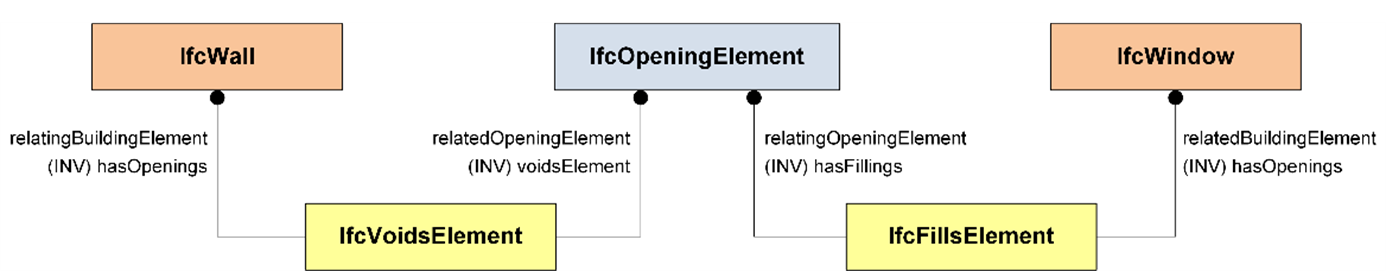

In [60]:
print(m.get_inverse(auswahl))

[#44=IfcRelContainedInSpatialStructure('2O_dMuDnr1Ahv28oR6ZVpr',#2,'Default Building','Contents of Building Storey',(#45,#97,#127),#35), #109=IfcRelVoidsElement('3lR5koIT51Kwudkm5eIoTu',#2,$,$,#45,#97), #131=IfcRelFillsElement('1CDlLMVMv1qw1giUXpQgxI',#2,$,$,#97,#124)]


Mit der Funktion `m.wrapped_data.types()` können wir uns alle im Modell verwendeten Datenypen anzeigen lassen:

In [ ]:
viewer.setDefaultColors()

In [84]:
## Schema und Intropsektion
import ifcopenshell.util
import ifcopenshell.util.element
print(ifcopenshell.util.element.get_psets(auswahl))

{'mein_eignes': {'eins': 'blah', 'zwe': 'blub', 'FireRating': '', 'Combustible': True, 'SurfaceSpreadOfFlame': '', 'ThermalTransmittance': 3.14, 'IsExternal': True, 'ExtendToStructure': False, 'LoadBearing': False, 'Compartmentation': False}}
